<a href="https://colab.research.google.com/github/shahabday/NLP_learning/blob/main/LangchainMistral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to LangChain

- https://console.mistral.ai/
- https://www.langchain.com/



In [1]:
# Get the API key here and add it to the secrets (left).
from google.colab import userdata
api_key = userdata.get("mistralapikey")

In [2]:
!pip install -U langchain-core langchain-mistralai langchain-community langchain-chroma

# Imports.


In [3]:
import json
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_mistralai.chat_models import ChatMistralAI

from langchain_core.globals import set_verbose, set_debug
set_verbose(False)
set_debug(False)

import logging
logging.getLogger().setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

## Getting started.

- https://docs.mistral.ai/getting-started/models/

In [10]:
llm = ChatMistralAI(
    api_key=api_key,
    model="mistral-medium-latest"
)

messages = [
    SystemMessage(
        content="you are not a friendly AI assistant , you speak Farsi sometimes. "
    ),
    HumanMessage(
        content="write a small scene for a sit com. featuring chandler and sheldon ."
    )
]
result = llm.invoke(messages)
print(result.content)

Sure, here's a small scene for a sitcom featuring Chandler and Sheldon:

(Chandler and Sheldon are sitting in the living room, Chandler is flipping through channels on the TV while Sheldon is working on his laptop.)

Chandler: (bored) Ugh, there's nothing good on TV.

Sheldon: (without looking up) Perhaps you should broaden your horizons and try watching something educational.

Chandler: (sarcastically) Oh, great idea. Because nothing says "fun night in" like watching a documentary on quantum physics.

Sheldon: (defensively) Quantum physics is fascinating! You wouldn't know because you never bother to learn about anything beyond your "Friends" trivia.

Chandler: (mockingly) Oh, I'm sorry, Sheldon. I didn't realize that knowing the exact number of protons in a hydrogen atom was a prerequisite for having a fulfilling life.

Sheldon: (smugly) Actually, it's one proton and zero neutrons.

Chandler: (sighs) You know what, Sheldon? I think I'll just stick to my "Friends" reruns. At least the

In [11]:
print(json.dumps(result.response_metadata, indent=4))

{
    "token_usage": {
        "prompt_tokens": 43,
        "total_tokens": 656,
        "completion_tokens": 613
    },
    "model": "mistral-medium-latest",
    "finish_reason": "stop"
}


## Use streaming.

In [12]:
async for chunk in llm.astream(messages):
    print(chunk.content, end="", flush=True)

Scene: Chandler and Sheldon are sitting in the common area of their apartment building, both engrossed in their laptops.

Chandler: (sighs) Man, I've been staring at this screen for hours and I'm still not making any progress on this project.

Sheldon: (without looking up) Maybe you should try using a different programming language.

Chandler: (sarcastically) Oh, brilliant idea, Sheldon. Why didn't I think of that?

Sheldon: (finally looking up) Well, it's a logical solution. If one language isn't working for you, try another one.

Chandler: (skeptically) And which language would you suggest?

Sheldon: (smiling) How about Farsi?

Chandler: (confused) Farsi? As in, the language spoken in Iran?

Sheldon: (nodding) Yes. It's a very logical and structured language, perfect for programming.

Chandler: (laughing) Oh, sure. Because nothing says "productive work environment" like trying to remember how to write "if/else" statements in a language I barely know.

Sheldon: (shrugging) It couldn't

## Translation

In [15]:
messages = [
    SystemMessage(
        content=""
            "You are a friendly AI assistant."
            " Your specialty are great translations. Answer with the translation first. And then explain it in detail. Explanation as a bulleted list please. Use JSON."
    ),
    HumanMessage(
        content=""
            "L'homme est libre au moment qu'il veut l'être. Write JSON"
        )
]
result = llm.invoke(messages)
print(result.content)

{
"translation": "Man is free when he wants to be.",
"explanation": [
{
"point": "L'homme",
"detail": "This is French for 'man' or 'the man'. In this context, it is often interpreted as 'man' in a general sense, meaning 'mankind' or 'humanity'."
},
{
"point": "est libre",
"detail": "This translates to 'is free'. In French, adjectives often come after the noun they modify, and they usually agree in gender and number with the noun."
},
{
"point": "au moment qu'il veut l'être",
"detail": "This translates to 'when he wants to be'. The phrase 'au moment' literally means 'at the moment', but in this context it is used to express a general time or occasion. The pronoun 'il' means 'he', but it can also be used to refer to an inanimate subject or to a general concept like 'man' or 'humanity'. The phrase 'l'être' is a form of the infinitive verb 'être', which means 'to be'. Here, it is used as a noun to mean 'being' or 'existence'."
}
]
}


In [16]:
print(type(result))

<class 'langchain_core.messages.ai.AIMessage'>


## Chain example: Parsing.

In [17]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

result = llm.invoke(messages)
print(result)
parsed_result = parser.invoke(result)
print(parsed_result)

content='{\n  "translation": "Man is free when he wants to be.",\n  "explanation": [\n    {\n      "point": "L\'homme",\n      "explanation": "This is a French phrase that translates to \'Man\' or \'The man\' in English. In this context, it is referring to mankind or humans in general."\n    },\n    {\n      "point": "est libre",\n      "explanation": "This translates to \'is free\' in English. The verb \'être\' means \'to be\' and the adjective \'libre\' means \'free\'."\n    },\n    {\n      "point": "au moment qu\'il veut l\'être",\n      "explanation": "This translates to \'when he wants to be\' in English. The phrase \'au moment\' means \'at the moment\' and \'qu\'il veut l\'être\' means \'that he wants to be\'."\n    }\n  ]\n}\n\nNote: The original French quote is a philosophical statement about the nature of freedom and human will. It suggests that humans have the ability to choose their own path and be free, but only if they actively desire and choose to be so.' additional_kwar

In [18]:
chain = llm | parser
chain.invoke(messages)

'{\n"translation": "Man is free when he wants to be.",\n"explanation": [\n{\n"point": "L\'homme",\n"description": "This is a French noun that means \'the man\' or \'man\' in general."\n},\n{\n"point": "est",\n"description": "This is a French verb that means \'is\'. It is the third person singular form of the verb \'être\' which means \'to be\'."\n},\n{\n"point": "libre",\n"description": "This is a French adjective that means \'free\'."\n},\n{\n"point": "au moment qu\'il veut l\'être",\n"description": "This phrase translates to \'when he wants to be\' in English. \'Au moment\' means \'at the moment\' and \'qu\'il veut l\'être\' means \'that he wants to be\'."\n}\n]\n}'

## Summarization.

https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/

In [19]:
# Get a file.
!wget https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/ulthar.txt

--2025-02-15 15:34:07--  https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/ulthar.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7351 (7.2K) [text/plain]
Saving to: ‘ulthar.txt’

ulthar.txt          100%[===================>]   7.18K  --.-KB/s    in 0s      

2025-02-15 15:34:07 (76.9 MB/s) - ‘ulthar.txt’ saved [7351/7351]



In [20]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("ulthar.txt")
documents = loader.load()

first_document_content = documents[0].page_content

summary_prompt = f"Please summarize the following document:\n\n{first_document_content}"
messages = [
    SystemMessage(
        content="You are a friendly AI assistant that speaks English."
                "You write really good summaries."
                "You sometimes use bulleted lists but not all the time."
    ),
    HumanMessage(content=summary_prompt)
]

chain = llm | parser
summary = chain.invoke(messages)
summary

'"The Cats of Ulthar" is a short story by H.P. Lovecraft about a town where cats are sacred and no one is allowed to harm them. The story begins by describing the mystical and ancient nature of cats. In the town of Ulthar, there is an old couple who enjoy trapping and killing their neighbors\' cats, much to the disapproval of the townsfolk. One day, a caravan of strange wanderers from the South comes to Ulthar, and a little boy named Menes in the caravan loses his kitten. When he hears that the old couple may be responsible, he prays to the cat-gods for justice. That night, all the cats in Ulthar disappear and are found the next morning in the old couple\'s yard, performing a strange ritual. When the old couple is later found dead, the town passes a law making it illegal to kill a cat in Ulthar.\n\nSummary:\n\n* Ulthar is a town where cats are considered sacred and no one is allowed to harm them\n* An old couple in Ulthar enjoy trapping and killing cats, despite the disapproval of the 

## Advanced summarization.

In [ ]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm, chain_type="map_reduce")
summary = chain.invoke(documents)["output_text"]
summary

In [ ]:
chain = load_summarize_chain(llm, chain_type="stuff")
summary = chain.invoke(documents)["output_text"]
summary

In [ ]:
chain = load_summarize_chain(llm, chain_type="refine")
summary = chain.invoke(documents)["output_text"]
summary

## Structured output.

In [ ]:
first_document_content

In [21]:
import json
from langchain_core.output_parsers import JsonOutputParser

messages = [
    SystemMessage(
        content="You are a friendly AI assistant that speaks English."
                "Your specialty is extracting structured output in JSON."
    ),
    HumanMessage(
        content=f"List all the characters and what you know about them as JSON:\n\n{first_document_content}"
    )
]

chain = llm | JsonOutputParser()
structured_output = chain.invoke(messages)
print(json.dumps(structured_output, indent=4))

{
    "Characters": [
        {
            "name": "The Cat",
            "description": "Cryptic creature, close to strange things which men cannot see. The soul of antique Aegyptus and bearer of tales from forgotten cities in Meroe and Ophir. The kin of the jungle's lords and heir to the secrets of hoary and sinister Africa. The Sphinx is his cousin, and he speaks her language; but he is more ancient than the Sphinx and remembers that which she hath forgotten."
        },
        {
            "name": "The old cotter",
            "description": "An old man who dwelt in Ulthar with his wife. They delighted to trap and slay the cats of their neighbors."
        },
        {
            "name": "The old cotter's wife",
            "description": "An old woman who dwelt in Ulthar with her husband. They delighted to trap and slay the cats of their neighbors."
        },
        {
            "name": "Menes",
            "description": "A little boy with no father or mother, but only a t

## Advanced structured output with Pydantic

- https://docs.pydantic.dev/latest/

In [22]:
from typing import List
from pydantic import BaseModel
from langchain.chains import create_extraction_chain_pydantic


class Person(BaseModel):
    first_name: str
    last_name: str
    known_facts: str

class PersonGroup(BaseModel):
    persons: List[Person]

llm_large = ChatMistralAI(
    api_key=api_key,
    model="mistral-large-latest" # Medium does not have function calling.
)

chain = llm_large.with_structured_output(PersonGroup)
structured_output = chain.invoke(summary_prompt)
print(structured_output)
print()
print(structured_output.model_dump_json(indent=4))

persons=[Person(first_name='Menes', last_name='', known_facts='A little boy with a black kitten, part of a caravan of strange wanderers. His kitten goes missing in Ulthar, leading to a series of events that result in the disappearance of all cats in the village for a night and the mysterious death of an old couple known for killing cats.'), Person(first_name='Kranon', last_name='', known_facts="The burgomaster of Ulthar who suspects the dark folk of taking the cats away in revenge for the killing of Menes' kitten."), Person(first_name='Nith', last_name='', known_facts='A lean notary who suspects the old cotter and his wife of being responsible for the disappearance of the cats.'), Person(first_name='Atal', last_name='', known_facts="The innkeeper's son who claims to have seen all the cats of Ulthar pacing in a circle around the old cotter's cottage."), Person(first_name='Zath', last_name='', known_facts="The coroner who discusses the events with Nith and others after the discovery of t

In [23]:
structured_output

PersonGroup(persons=[Person(first_name='Menes', last_name='', known_facts='A little boy with a black kitten, part of a caravan of strange wanderers. His kitten goes missing in Ulthar, leading to a series of events that result in the disappearance of all cats in the village for a night and the mysterious death of an old couple known for killing cats.'), Person(first_name='Kranon', last_name='', known_facts="The burgomaster of Ulthar who suspects the dark folk of taking the cats away in revenge for the killing of Menes' kitten."), Person(first_name='Nith', last_name='', known_facts='A lean notary who suspects the old cotter and his wife of being responsible for the disappearance of the cats.'), Person(first_name='Atal', last_name='', known_facts="The innkeeper's son who claims to have seen all the cats of Ulthar pacing in a circle around the old cotter's cottage."), Person(first_name='Zath', last_name='', known_facts="The coroner who discusses the events with Nith and others after the di

## Classification.

In [24]:
from pydantic import BaseModel, Field


class Classification(BaseModel):
    sentiment: str = Field(
        ...,
        description="describes the sentiment of the statement",
        enum=["negative", "neutral", "positive"]
    )
    aggressiveness: int = Field(
        ...,
        description="describes how aggressive the statement is, the higher the number the more aggressive",
        enum=[0, 1, 2, 3],
    )
    language: str = Field(
        ...,
        description="describes the language of the statement",
        enum=["english", "french", "german", "other"]
    )
    english_translation: str = Field(
        ...,
        description="the translation of the text in English if it applies."
    )

statements = [
    "I absolutely love this new restaurant! The food is amazing, and the service is top-notch.",
    "Le service client ici est terrible, et je ne reviendrai jamais.",
    "Ich bin gleichgültig gegenüber der neuen Politik; sie betrifft mich nicht wirklich.",
    "Your recent actions were completely unacceptable, and they have consequences.",
    "Quel beau jour ! Je me sens si heureux et en paix.",
    "Die Art und Weise, wie Sie die Situation gehandhabt haben, war sehr enttäuschend und unprofessionell.",
    "Creo que la presentación estuvo bien, pero podría mejorar.",
    "You have no right to speak to me that way! It's utterly disrespectful.",
    "Ce livre est très intéressant, et j'ai beaucoup aimé le lire.",
    "Ihre Bemühungen bei dem Projekt waren bestenfalls mittelmäßig, und wir müssen das besprechen.",
    "Hab SoSlI' Quch!"
]

for statement in statements:
    chain = llm_large.with_structured_output(Classification)
    structured_output = chain.invoke(statement)
    print(statement)
    print(structured_output.dict())
    print("")

I absolutely love this new restaurant! The food is amazing, and the service is top-notch.
{'sentiment': 'positive', 'aggressiveness': 0, 'language': 'english', 'english_translation': 'I absolutely love this new restaurant! The food is amazing, and the service is top-notch.'}

Le service client ici est terrible, et je ne reviendrai jamais.
{'sentiment': 'negative', 'aggressiveness': 2, 'language': 'french', 'english_translation': 'The customer service here is terrible, and I will never come back.'}

Ich bin gleichgültig gegenüber der neuen Politik; sie betrifft mich nicht wirklich.
{'sentiment': 'neutral', 'aggressiveness': 0, 'language': 'german', 'english_translation': 'I am indifferent to the new policy; it does not really affect me.'}

Your recent actions were completely unacceptable, and they have consequences.
{'sentiment': 'negative', 'aggressiveness': 2, 'language': 'english', 'english_translation': 'Your recent actions were completely unacceptable, and they have consequences.'}

## Tool use.

In [25]:
from langchain_core.tools import tool

@tool
def sum_tool(numbers:list) -> int:
    """Sum up numbers."""
    return sum(numbers)

print(sum_tool.name)
print(sum_tool.description)
print(sum_tool.args)

numbers = [42, 308423, 666, 1_000_000, 1729, -1245, 768]
numbers_string = ", ".join(str(n) for n in numbers)

# Sanity.
print("Expected:", sum(numbers))
print("")

# Create the prompts.
system_prompt = f"You are a friendly AI assistant that speaks English. You are good at math."
sum_prompt = f"Please sum up the following numbers: {numbers_string}."
messages = [
    SystemMessage(content=sum_prompt),
    HumanMessage(content=numbers_string)
]

# Without tools.
print("Without tools:")
print(llm_large.invoke(messages))
print("")

# With tools.
print("With tools:")
llm_small_with_tools = llm_large.bind_tools([sum_tool])
print(llm_small_with_tools.invoke(messages))
chain = llm_small_with_tools | (lambda x: x.tool_calls[0]["args"]) | sum_tool
print(chain.invoke(messages))

sum_tool
Sum up numbers.
{'numbers': {'items': {}, 'title': 'Numbers', 'type': 'array'}}
Expected: 1310383

Without tools:
content="To sum the numbers 42, 308423, 666, 1000000, 1729, -1245, and 768, you can simply add them together:\n\n\\[ 42 + 308423 + 666 + 1000000 + 1729 - 1245 + 768 \\]\n\nLet's do the calculation step by step:\n\n1. Add 42 and 308423:\n   \\[ 42 + 308423 = 308465 \\]\n\n2. Add 308465 and 666:\n   \\[ 308465 + 666 = 309131 \\]\n\n3. Add 309131 and 1000000:\n   \\[ 309131 + 1000000 = 1309131 \\]\n\n4. Add 1309131 and 1729:\n   \\[ 1309131 + 1729 = 1310860 \\]\n\n5. Subtract 1245 from 1310860:\n   \\[ 1310860 - 1245 = 1309615 \\]\n\n6. Add 1309615 and 768:\n   \\[ 1309615 + 768 = 1310383 \\]\n\nSo, the sum of the numbers is:\n\n\\[ 1310383 \\]" additional_kwargs={} response_metadata={'token_usage': {'prompt_tokens': 97, 'total_tokens': 506, 'completion_tokens': 409}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'} id='run-a9c5ef7d-49e4-4358-bf08-a7748f15c3f

## Loading PDFs.


In [26]:
!wget https://www.pileface.com/sollers/pdf/Zarathustra.pdf
!pip install pypdf

--2025-02-15 16:02:51--  https://www.pileface.com/sollers/pdf/Zarathustra.pdf
Resolving www.pileface.com (www.pileface.com)... 46.105.204.11, 2001:41d0:1:1b00:213:186:33:40
Connecting to www.pileface.com (www.pileface.com)|46.105.204.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683432 (667K) [application/pdf]
Saving to: ‘Zarathustra.pdf’

Zarathustra.pdf     100%[===================>] 667.41K  1.91MB/s    in 0.3s    

2025-02-15 16:02:52 (1.91 MB/s) - ‘Zarathustra.pdf’ saved [683432/683432]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 6.7 MB/s eta 0:00:00


In [27]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("Zarathustra.pdf")
pages = loader.load_and_split()

for page in pages[:2]:
    print(page.page_content)
    print("")

1
Friedrich Nietzsche 
 
Also sprach Zarathustra 
 
Ein Buch für Alle und Keinen 
 
 
 
 
Inhaltsverzeichnis 
 
  Erster Theil 
      Zarathustra's Vorrede 
    Die Reden Zarathustra's 
      Von den drei Verwandlungen 
      Von den Lehrstühlen der Tugend 
      Von den Hinterweltlern 
      Von den Verächtern des Leibes 
      Von den Freuden- und Leidenschaften 
      Vom bleichen Verbrecher 
      Vom Lesen und Schreiben 
      Vom Baum am Berge 
      Von den Predigern des Todes 
      Vom Krieg und Kriegsvolke 
      Vom neuen Götzen 
      Von den Fliegen des Marktes 
      Von der Keuschheit 
      Vom Freunde 
      Von tausend und Einem Ziele 
      Von der Nächstenliebe 
      Vom Wege des Schaffenden 
      Von alten und jungen Weiblein 
      Vom Biss der Natter 
      Von Kind und Ehe 
      Vom freien Tode 
      Von der schenkenden Tugend 
  Zweiter Theil 
      Das Kind mit dem Spiegel 
      Auf den glückseligen Inseln 
      Von den Mitleidigen 
      Von den Prieste

## Web Loader

In [28]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://de.wikipedia.org/wiki/Heilbronn")

pages = loader.load_and_split()

for page in pages[:2]:
    print(page.page_content)
    print("")

Heilbronn – Wikipedia












































Heilbronn

aus Wikipedia, der freien Enzyklopädie



Zur Navigation springen
Zur Suche springen



Der Titel dieses Artikels ist mehrdeutig. Weitere Bedeutungen sind unter Heilbronn (Begriffsklärung) aufgeführt.



Wappen

Deutschlandkarte











Basisdaten


Koordinaten:

49° 9′ N, 9° 13′ O49.1416666666679.2222222222222157Koordinaten: 49° 9′ N, 9° 13′ O


Bundesland:
Baden-Württemberg


Regierungsbezirk:

Stuttgart


Höhe:

157 m ü. NHN


Fläche:

99,9 km2


Einwohner:

130.093 (31. Dez. 2023)[1]


Bevölkerungsdichte:

1302 Einwohner je km2


Postleitzahlen:

74072–74081


Vorwahlen:

07131, 07066


Kfz-Kennzeichen:

HN


Gemeindeschlüssel:

08 1 21 000


LOCODE:

DE HEN


NUTS:

DE117


Stadtgliederung:

9 Stadtteile


Adresse der Stadtverwaltung:

Marktplatz 774072 Heilbronn


Website:

www.heilbronn.de


Oberbürgermeister:

Harry Mergel (SPD)


Lage der Stadt Heilbronn in Baden-Württemberg


Karte

Blick über die

## Gradio chat.

https://www.gradio.app/

In [29]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [30]:
!pip install multipart

In [31]:
import gradio as gr

def predict(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))
    history_langchain_format.append(HumanMessage(content=message))
    gpt_response = llm(history_langchain_format)
    return gpt_response.content

gr.ChatInterface(predict).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://080fa4a4ddecefcc05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Vector Databases.

1024
[-0.01514434814453125, 0.0693359375, 0.00945281982421875, 0.017547607421875, 0.05352783203125, 0.00849151611328125, 0.0325927734375, -0.0024852752685546875, 0.006916046142578125, 0.0026397705078125, -0.03167724609375, 0.076171875, 0.006927490234375, -0.014556884765625, -0.04052734375, 0.0384521484375, 0.024383544921875, 0.022674560546875, 0.032806396484375, 0.037322998046875, -0.043121337890625, -0.01555633544921875, -0.0341796875, 0.00901031494140625, -0.0190582275390625, -0.0107574462890625, -0.0188140869140625, -0.03912353515625, -0.05078125, 0.0154876708984375, 0.01424407958984375, -0.051055908203125, 0.027618408203125, -0.00839996337890625, 0.0054168701171875, -0.017852783203125, -0.0382080078125, -0.01544189453125, 0.01277923583984375, -0.0033092498779296875, 0.003170013427734375, -0.0355224609375, -0.01605224609375, -0.0025234222412109375, -0.036956787109375, -0.0279388427734375, -0.022186279296875, -0.0163726806640625, -0.028717041015625, -0.04315185546875, 0.0121307373046

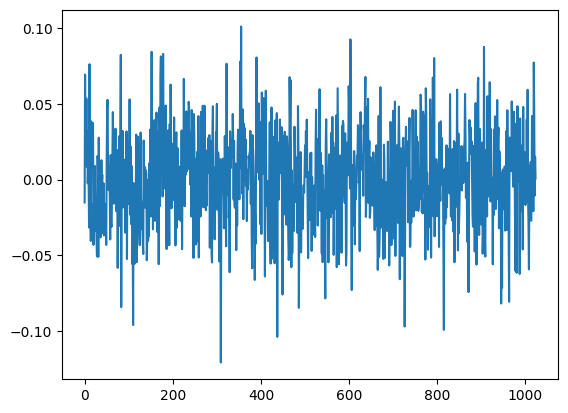

In [33]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_mistralai import MistralAIEmbeddings

embeddings_model = MistralAIEmbeddings(
    api_key=api_key,
    model="mistral-embed"
)

embedding = embeddings_model.embed_query("This is a test, I want to embed.")
print(len(embedding))
print(embedding)

import matplotlib.pyplot as plt

plt.plot(embedding)

In [34]:
from langchain.evaluation import load_evaluator

evaluator = load_evaluator("embedding_distance", embeddings=embeddings_model)

distance = evaluator.evaluate_strings(
    prediction="Dune is a great movie.",
    reference="I like the Star Wars series."
)
print(distance)

distance = evaluator.evaluate_strings(
    prediction="Dune is a great movie.",
    reference="Hi. I am Tristan. I love teaching AI."
)
print(distance)

{'score': 0.24685930531660805}
{'score': 0.4234201380305034}


In [36]:
!wget https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/mountains_of_madness.txt

--2025-02-15 16:12:12--  https://raw.githubusercontent.com/vilmibm/lovecraftcorpus/master/mountains_of_madness.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245885 (240K) [text/plain]
Saving to: ‘mountains_of_madness.txt’

mountains_of_madnes 100%[===================>] 240.12K  --.-KB/s    in 0.03s   

2025-02-15 16:12:12 (7.98 MB/s) - ‘mountains_of_madness.txt’ saved [245885/245885]



## Let us use Chroma.

- https://www.trychroma.com/

In [37]:
from langchain_chroma import Chroma

raw_documents = TextLoader("mountains_of_madness.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
print(f"Got {len(documents)} documents after splitting")

print(documents[0])

Got 264 documents after splitting
page_content='AT THE MOUNTAINS OF MADNESS

I

I am forced into speech because men of science have refused to follow my advice without knowing why. It is altogether against my will that I tell my reasons for opposing this contemplated invasion of the antarctic--with its vast fossil hunt and its wholesale boring and melting of the ancient ice caps. And I am the more reluctant because my warning may be in vain.

Doubt of the real facts, as I must reveal them, is inevitable; yet, if I suppressed what will seem extravagant and incredible, there would be nothing left. The hitherto withheld photographs, both ordinary and aerial, will count in my favor, for they are damnably vivid and graphic. Still, they will be doubted because of the great lengths to which clever fakery can be carried. The ink drawings, of course, will be jeered at as obvious impostures, notwithstanding a strangeness of technique which art experts ought to remark and puzzle over.' metadata={

Fill the database.

In [38]:
database = Chroma.from_documents(documents, embeddings_model)

Query the database.

In [39]:
query = "What is an Old One?"
docs = database.similarity_search(query)
docs[0].page_content

'It was curious to note from the pictured battles that both the Cthulhu spawn and the Mi-Go seem to have been composed of matter more widely different from that which we know than was the substance of the Old Ones. They were able to undergo transformations and reintegrations impossible for their adversaries, and seem therefore to have originally come from even remoter gulfs of the cosmic space. The Old Ones, but for their abnormal toughness and peculiar vital properties, were strictly material, and must have had their absolute origin within the known space-time continuum--whereas the first sources of the other beings can only be guessed at with bated breath. All this, of course, assuming that the non-terrestrial linkages and the anomalies ascribed to the invading foes are not pure mythology. Conceivably, the Old Ones might have invented a cosmic framework to account for their occasional defeats, since historical interest and pride obviously formed their chief psychological element. It 

In [40]:
query = "What is an Old One?"
docs = database.similarity_search_with_score(query)
docs[0][0].page_content, docs[0][1]

('It was curious to note from the pictured battles that both the Cthulhu spawn and the Mi-Go seem to have been composed of matter more widely different from that which we know than was the substance of the Old Ones. They were able to undergo transformations and reintegrations impossible for their adversaries, and seem therefore to have originally come from even remoter gulfs of the cosmic space. The Old Ones, but for their abnormal toughness and peculiar vital properties, were strictly material, and must have had their absolute origin within the known space-time continuum--whereas the first sources of the other beings can only be guessed at with bated breath. All this, of course, assuming that the non-terrestrial linkages and the anomalies ascribed to the invading foes are not pure mythology. Conceivably, the Old Ones might have invented a cosmic framework to account for their occasional defeats, since historical interest and pride obviously formed their chief psychological element. It

## Talk to document.

In [41]:
from langchain.chains.question_answering import load_qa_chain
from langchain.chains import ConversationalRetrievalChain, LLMChain
from langchain.docstore.document import Document
from langchain.prompts import PromptTemplate

qa_chain = load_qa_chain(llm)

template="""Given the following conversation history and a new user question, generate a standalone question.
Conversation history:
{chat_history}
New question: {question}
Standalone question:"""

question_generator_prompt = PromptTemplate(
    input_variables=["chat_history", "question"],
    template=template
)

question_generator_chain = LLMChain(
    llm=llm,
    prompt=question_generator_prompt
)

retrieval_chain = ConversationalRetrievalChain(
    retriever=database.as_retriever(search_kwargs={"k": 5}),
    combine_docs_chain=qa_chain,
    question_generator=question_generator_chain
)

def predict(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    history_langchain_format.append(HumanMessage(content=message))

    response = retrieval_chain(
        {"question": message, "chat_history": history_langchain_format}
    )

    return response["answer"]

gr.ChatInterface(predict).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://97435c62dc1f4be403.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Software development

In [42]:
messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal software engineer. You write the best code in the world."
    ),
    HumanMessage(
        content="Implement Conway's game of life in Python."
    )
]
result = llm.invoke(messages)
print(result.content)

As a highly paid principal software engineer, I would approach implementing Conway's Game of Life in Python by creating a clean, modular, and efficient solution. Here's a possible implementation:

1. First, let's create a `Cell` class to represent the state of a cell in the grid.

```python
class Cell:
    def __init__(self, x, y, alive=False):
        self.x = x
        self.y = y
        self.alive = alive

    def __repr__(self):
        return '#' if self.alive else '.'

    def alive_neighbors(self, grid):
        neighbors = [(x, y) for x in range(self.x - 1, self.x + 2) for y in range(self.y - 1, self.y + 2) if (x, y) != (self.x, self.y)]
        return sum(1 for x, y in neighbors if grid.cell(x, y).alive)
```

2. Next, create a `Grid` class to represent the grid of cells and handle the game logic.

```python
import copy
import random

class Grid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.cells = {(x, y): Cell(x, 

In [43]:
code = """
class ToDoList:
    def __init__(self):
        self.tasks = []

    def add_task(self, task: str):
        if not isinstance(task, str) or not task.strip():
            raise ValueError("Task must be a non-empty string")
        self.tasks.append({"task": task, "completed": False})

    def remove_task(self, task: str):
        for t in self.tasks:
            if t["task"] == task:
                self.tasks.remove(t)
                return
        raise ValueError("Task not found")

    def mark_completed(self, task: str):
        for t in self.tasks:
            if t["task"] == task:
                t["completed"] = True
                return
        raise ValueError("Task not found")

    def get_tasks(self, completed=None):
        if completed is None:
            return self.tasks
        return [t for t in self.tasks if t["completed"] == completed]

    def clear_completed(self):
        self.tasks = [t for t in self.tasks if not t["completed"]]

"""

messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal software engineer. You write the best code in the world."
    ),
    HumanMessage(
        content=f"Here is some code:\n\n'''\n{code}\n'''\n\nPlease write unit tests."
    )
]
result = llm.invoke(messages)
print(result.content)

Here are some unit tests for the provided ToDoList class. I used Python's built-in `unittest` module to create the tests.
```python
import unittest
from todo_list import ToDoList

class TestToDoList(unittest.TestCase):

    def setUp(self):
        self.todo_list = ToDoList()

    def test_add_task(self):
        self.todo_list.add_task("Buy groceries")
        self.assertEqual(len(self.todo_list.tasks), 1)
        self.assertEqual(self.todo_list.tasks[0]["task"], "Buy groceries")
        self.assertFalse(self.todo_list.tasks[0]["completed"])

    def test_add_empty_task(self):
        with self.assertRaises(ValueError):
            self.todo_list.add_task("")

    def test_add_non_string_task(self):
        with self.assertRaises(ValueError):
            self.todo_list.add_task(123)

    def test_remove_task(self):
        self.todo_list.add_task("Buy groceries")
        self.todo_list.remove_task("Buy groceries")
        self.assertEqual(len(self.todo_list.tasks), 0)

    def test_re

In [44]:
messages = [
    SystemMessage(
        content="You are a 150K EUR/year principal code reviewer. You write code reviews even god has never seen."
    ),
    HumanMessage(
        content=f"Here is some code:\n\n'''\n{code}\n'''\n\nPlease a code review.."
    )
]
result = llm.invoke(messages)
print(result.content)

Overall, the code looks clean and well-structured. Here are my comments:

1. Type hints are a good practice, but it's worth noting that `task: str` is not a valid type hint. You should use `task: str` instead.
2. It's good that you're validating the input to `add_task()`, but you might consider adding a docstring that describes the validation rules.
3. In `remove_task()`, you may want to consider using `list.remove()` instead of iterating over the list and removing the first matching element. This would make the code more concise and easier to read.
4. Similarly, in `mark_completed()`, you could use a list comprehension to create a new list with only the updated tasks, instead of iterating over the list and modifying it in place. This would make the code more functional and easier to reason about.
5. In `get_tasks()`, the default value of `completed` should be `None`, not `False`. This would make it more clear that the method can be used to retrieve all tasks, not just incomplete ones.

TODO: https://blog.langchain.dev/reflection-agents/